# Introduction to Web Scraping

Main things we need to understand:
- Rules of web scraping
- Limitations of web scraping
- Basic HTML and CSS

Rules:
- ALyways try to get permission before scraping!
- If you make too many scraping attempts or requests your IP address could be blocked!
- Some sites automatically block scaping software

Limitations of Seb Scraping
- In general every website is unique, which measn every web scraping script is unique
- A slight change or update to a website may completely break your web scraping script

Main front end component of a website

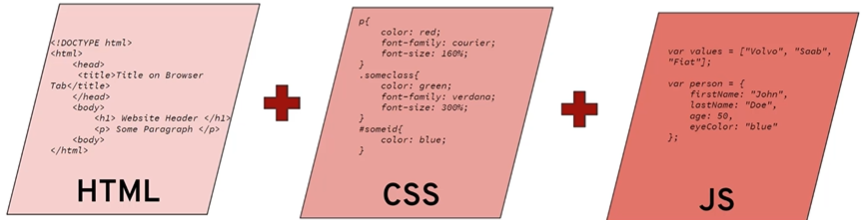

HTML is used to create the basic structure and content of a webpage. CSS is used for the design and style of a webpage, where elements are placed and how it looks. JavaScript is used to define the interactive elements of a webpage. 

In HTML, we are going to search for tags to navigate through the code. 

# Setting Up Web Scraping Libraries

In [1]:
import requests

In [2]:
import bs4

In [3]:
import lxml

# Grabbing a Title

In [4]:
import requests

In [13]:
# Need to get a webpage through a request
result = requests.get('http://www.example.com/')

In [14]:
type(result)

requests.models.Response

In [15]:
# Notice this returns the HTML document
# Stored as a large python string
result.text

'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 2em;\n        background-color: #fdfdff;\n        border-radius: 0.5em;\n        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        div {\n            margin: 0 auto;\n            width: auto;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\n    <

To effectively parse through this, we use beautiful soup. 

In [16]:
import bs4
import lxml

In [19]:
# We pass in the text and what engine to use to parse through the text
# BS4 uses lxml to figure out what is what
# lxml didn't work for some reason - couldn't find a soltution
# besides using a different parser
soup = bs4.BeautifulSoup(result.text,'html.parser')

In [20]:
soup

<!DOCTYPE html>

<html>
<head>
<title>Example Domain</title>
<meta charset="utf-8"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>
</head>
<body>
<div>
<h1>Example Domain</h1>
<p>This domain is for use in illustrative example

In [22]:
# Grabbing the title
soup.select('title')
# Notice it returned a list, as it could return multiple items

[<title>Example Domain</title>]

In [25]:
# Let's grab the actual text
soup.select('title')[0].getText()

'Example Domain'

In [26]:
# Lets do another example with paragraphs
site_paragraphs = soup.select('p')

In [27]:
site_paragraphs

[<p>This domain is for use in illustrative examples in documents. You may use this
     domain in literature without prior coordination or asking for permission.</p>,
 <p><a href="https://www.iana.org/domains/example">More information...</a></p>]

In [28]:
site_paragraphs[0].getText()

'This domain is for use in illustrative examples in documents. You may use this\n    domain in literature without prior coordination or asking for permission.'

# Grabbing a Class

In [30]:
from IPython.display import Image

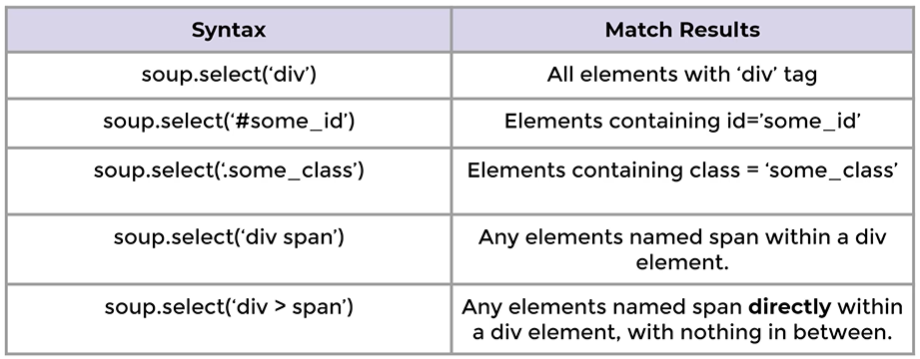

In [31]:
Image(filename='BS4 string syntax.png')

In [33]:
res = requests.get('https://en.wikipedia.org/wiki/Grace_Hopper')

In [34]:
soup = bs4.BeautifulSoup(res.text, 'html.parser')

In [36]:
soup.select('.toctext')

[<span class="toctext">Early life and education</span>,
 <span class="toctext">Career</span>,
 <span class="toctext">World War II</span>,
 <span class="toctext">UNIVAC</span>,
 <span class="toctext">COBOL</span>,
 <span class="toctext">Standards</span>,
 <span class="toctext">Retirement</span>,
 <span class="toctext">Post-retirement</span>,
 <span class="toctext">Anecdotes</span>,
 <span class="toctext">Death</span>,
 <span class="toctext">Dates of rank</span>,
 <span class="toctext">Awards and honors</span>,
 <span class="toctext">Military awards</span>,
 <span class="toctext">Other awards</span>,
 <span class="toctext">Legacy</span>,
 <span class="toctext">Places</span>,
 <span class="toctext">Programs</span>,
 <span class="toctext">In popular culture</span>,
 <span class="toctext">Grace Hopper Celebration of Women in Computing</span>,
 <span class="toctext">See also</span>,
 <span class="toctext">Notes</span>,
 <span class="toctext">Obituary notices</span>,
 <span class="toctext">Re

In [37]:
# we just want the text and not the span class= stuff
for item in soup.select('.toctext'):
    print(item.text)

Early life and education
Career
World War II
UNIVAC
COBOL
Standards
Retirement
Post-retirement
Anecdotes
Death
Dates of rank
Awards and honors
Military awards
Other awards
Legacy
Places
Programs
In popular culture
Grace Hopper Celebration of Women in Computing
See also
Notes
Obituary notices
References
Further reading
External links


# Grabbing an Image

In [38]:
res = requests.get('https://en.wikipedia.org/wiki/Deep_Blue_(chess_computer)')

In [39]:
soup = bs4.BeautifulSoup(res.text, 'html.parser')

In [44]:
kasparov = soup.select('.thumbimage')[0]

In [46]:
kasparov['src']

'//upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Kasparov_Magath_1985_Hamburg-2.png/220px-Kasparov_Magath_1985_Hamburg-2.png'

Make the cell a mark down and add your own img tag

<img src='//upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Kasparov_Magath_1985_Hamburg-2.png/220px-Kasparov_Magath_1985_Hamburg-2.png'>

Lets make a new request on the actual image url to save the image

In [47]:
image_link = requests.get('https://upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Kasparov_Magath_1985_Hamburg-2.png/220px-Kasparov_Magath_1985_Hamburg-2.png')

In [51]:
# image_link.content
f = open('kasparov.jpg', 'wb')

In [52]:
f.write(image_link.content)

85054

In [53]:
f.close()